In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [547]:
data=pd.read_csv('Lionel Messi Goals.csv')
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [548]:
df=data["Goal Type"].value_counts().reset_index()
df

,Goal Type,count
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


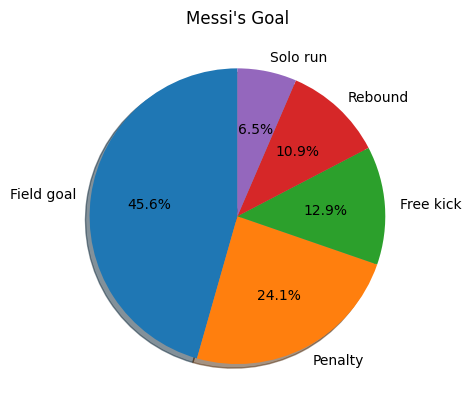

In [549]:
plt.pie(df["count"],labels=df["Goal Type"],autopct="%1.1f%%",shadow=True,startangle=90)
plt.title("Messi's Goal")
plt.show()

In [550]:
df=data["Goal Method"].value_counts().reset_index()
df

,Goal Method,count
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


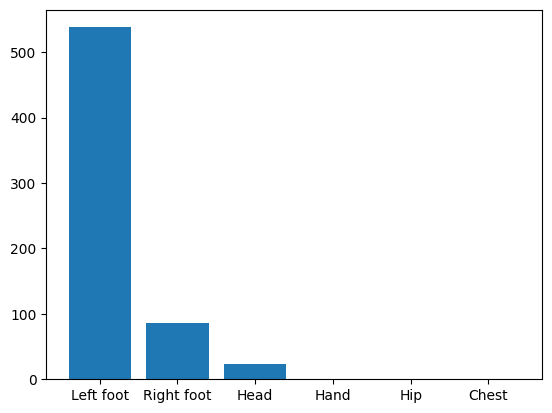

In [551]:
plt.bar(df["Goal Method"],df["count"])
plt.show()

preprocess for converting 90+2 to 92

In [552]:
data["Minute"]=data["Minute"].apply(eval)

In [553]:
data["Minute"]=data["Minute"].astype(int)

In [554]:
df=data["Minute"].value_counts().reset_index().sort_values(by=["Minute"],ascending=True)
df

,Minute,count
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


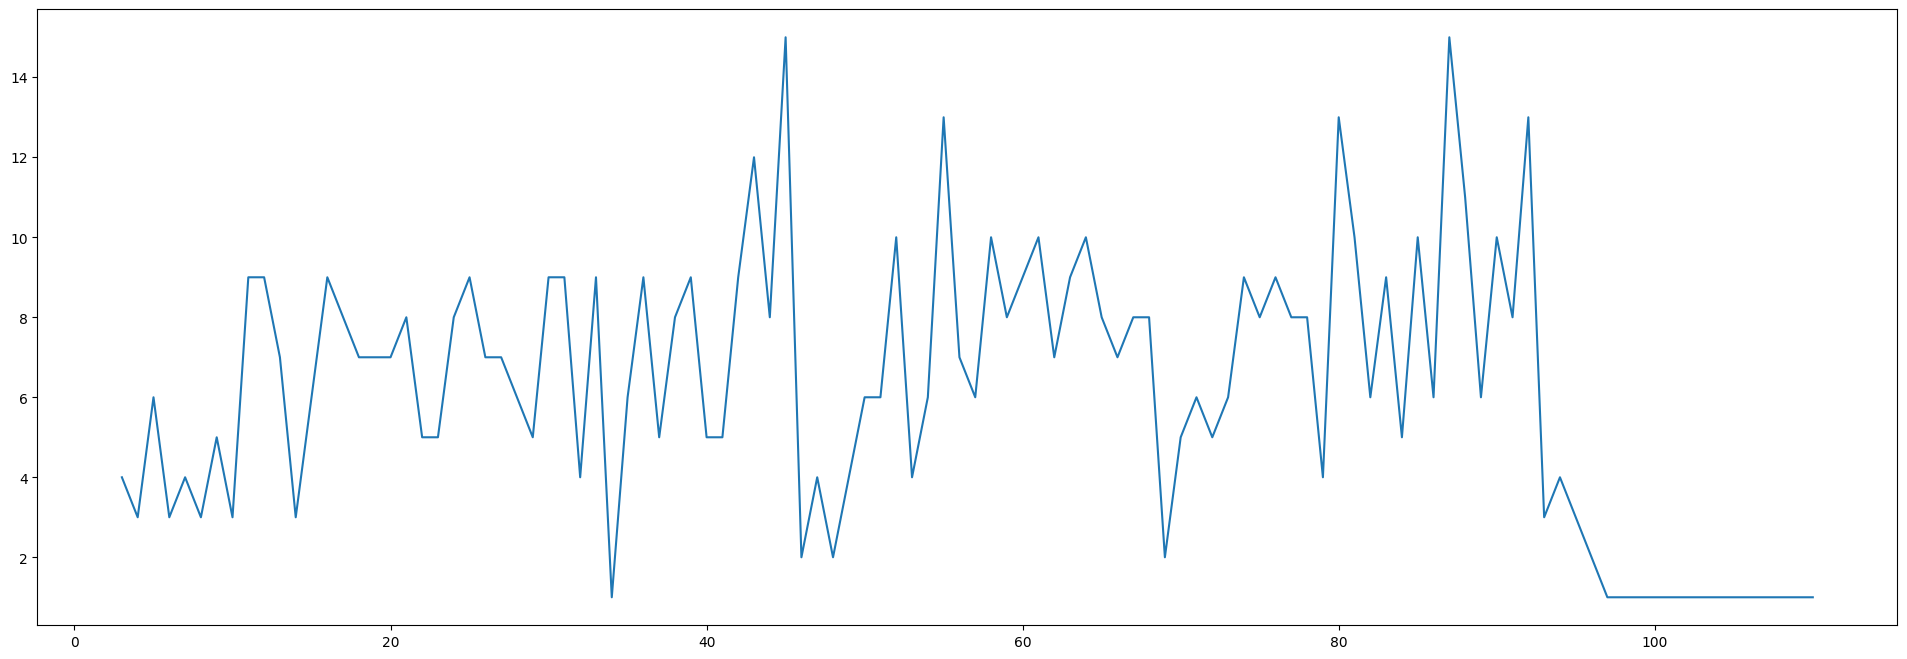

In [555]:
plt.figure(figsize=(24,8))
plt.plot(df["Minute"],df["count"])
plt.show()

پیش پردازش ستون تاریخ

In [556]:
data['Year']=data['Date'].str[-4:]
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result,Year
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,2019
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,2019
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,2018
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,2018
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,2018


نمایش تعداد گل های مسی در هر سال

In [557]:
df=data['Year'].value_counts().reset_index().sort_values(by="Year")
df

,Year,count
14,2005,3
13,2006,12
10,2007,31
11,2008,22
9,2009,41
1,2010,60
3,2011,59
0,2012,91
8,2013,45
4,2014,58


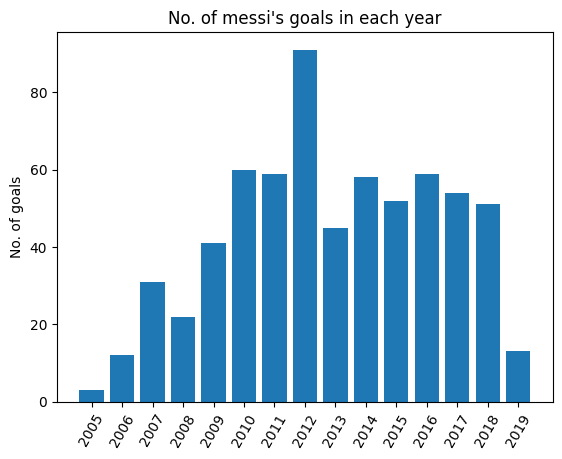

In [558]:
plt.bar(df['Year'],df['count'])
plt.title("No. of messi's goals in each year")
# plt.xlabel('Year')
plt.ylabel('No. of goals')
plt.xticks(rotation=60)
# plt.grid()
plt.show()

مسی اکثر پنالتی ها را با پای چپ زده است یا با پای راست؟ بر روی نمودار نمایش دهید

In [559]:
data['Goal_Type']= data['Goal Type']
data.drop('Goal Type',axis=1, inplace=True)
data['Goal_Method']= data['Goal Method']
data.drop('Goal Method',axis=1, inplace=True)
data.head()


,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Final Game Result,Year,Goal_Type,Goal_Method
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Won,2019,Penalty,Left foot
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Won,2019,Field goal,Left foot
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Won,2018,Field goal,Left foot
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Won,2018,Field goal,Left foot
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Draw,2018,Field goal,Left foot


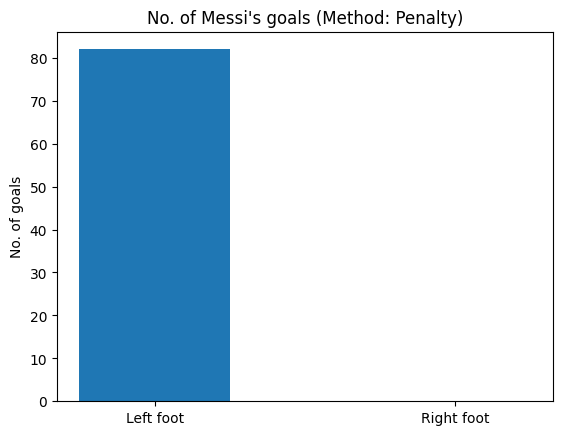

In [560]:
x_axis=np.array(['Left foot', 'Right foot'])
y1=data.query("Goal_Type=='Penalty' & Goal_Method=='Left foot'")['Year'].value_counts().sum()
y2=data.query("Goal_Type=='Penalty' & Goal_Method=='Right foot'")['Year'].value_counts().sum()
y_axis=np.array([y1,y2])

plt.bar(x_axis,y_axis,width=0.5)
plt.title("No. of Messi's goals (Method: Penalty)")
plt.ylabel("No. of goals")
plt.show()

چند درصد بازی هایی که در آن ها مسی در وقت اضافه گل زده است، به پیروزی ختم شده اند؟ بر روی نمودار نمایش دهید

In [561]:
df=data.query("Minute>90")["Final Game Result"].value_counts().reset_index()
df

,Final Game Result,count
0,Won,27
1,Lost,2
2,Draw,1


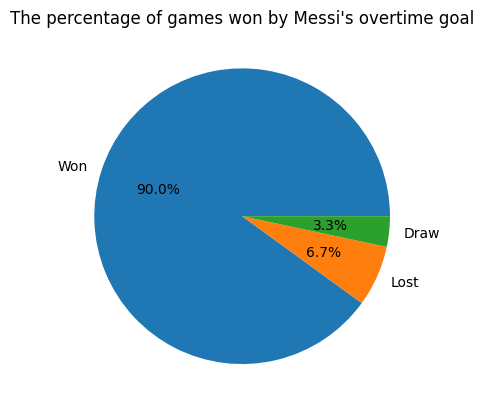

In [562]:
plt.pie(df['count'],labels=df['Final Game Result'],autopct="%1.1f%%")
plt.title("The percentage of games won by Messi's overtime goal")
plt.show()

چند درصد گل های مسی گل تساوی بوده است؟

In [563]:
df=data.query()

TypeError: DataFrame.query() missing 1 required positional argument: 'expr'